In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Apple_2020= 

start = datetime.date(2020, 1, 1)
end = datetime.date(2020,12 , 31)

data = yf.download('AAPL', 
                      start=start, 
                      end=end, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449387,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735306,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970070,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143898,132079200


In [4]:
Close = data[['Date','Close']]
Close.head()

,Date,Close
0,2020-01-02,75.087502
1,2020-01-03,74.357498
2,2020-01-06,74.949997
3,2020-01-07,74.597504
4,2020-01-08,75.797501


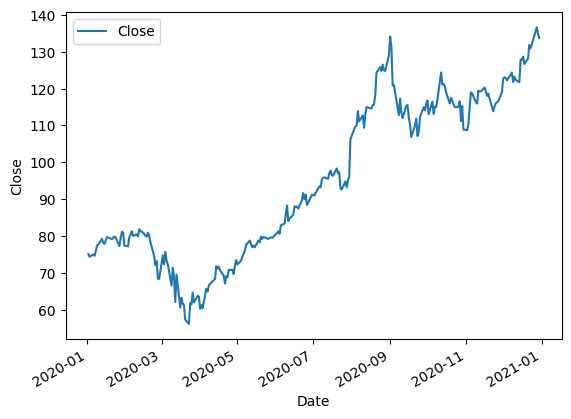

In [5]:
Close.plot('Date','Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

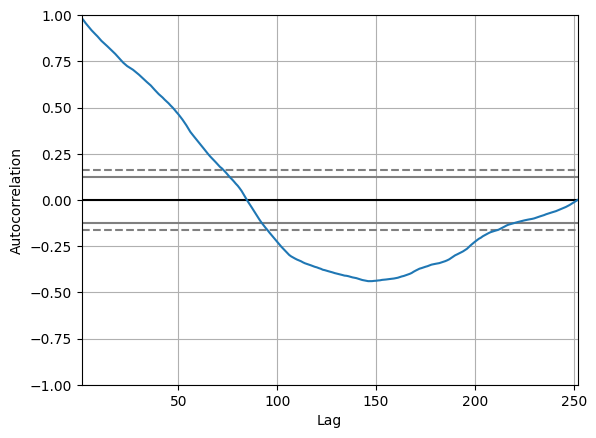

In [7]:
pd.plotting.autocorrelation_plot(Close['Close']) # p = 6

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


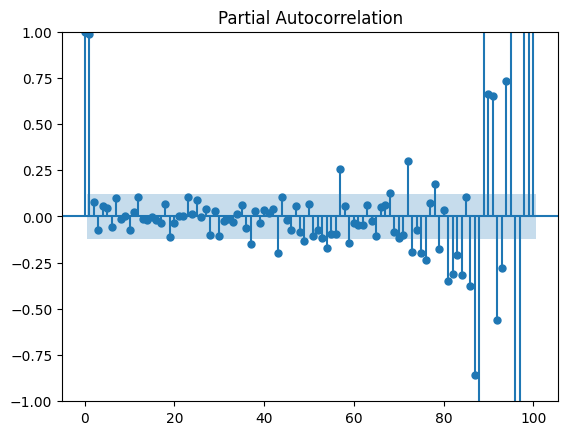

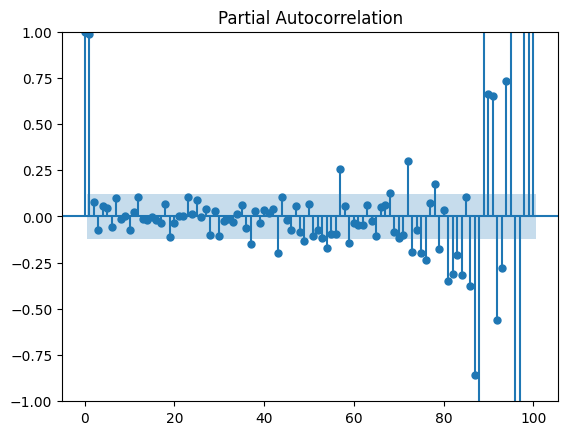

In [8]:
plot_pacf(Close["Close"], lags = 100)